In [2]:
import os
# Load environment variables from .env file
from dotenv import load_dotenv
from langchain.chat_models import ChatOpenAI
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


In [3]:
load_dotenv()# Initialize the chat model
llm =  ChatOpenAI()
# Define the state type
class MathChatState(TypedDict):
    messages: Annotated[list,add_messages]

def math_bot_node(state: MathChatState) -> MathChatState:
    """
    A node that interacts with the user to solve a math problem.
    """
    reply = llm.invoke(state["messages"])
    return {"messages": [reply]}  # add_messages will merge it


/var/folders/s5/pn9wl0y93zx580k57w68lgqc0000gn/T/ipykernel_5147/2194734836.py:2: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm =  ChatOpenAI()


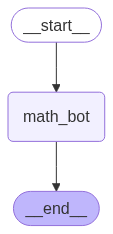

In [6]:
build_graph = StateGraph(MathChatState) 
build_graph.add_node("math_bot", math_bot_node)
build_graph.add_edge(START, "math_bot")
build_graph.add_edge("math_bot", END)
# Create the graph  
math_chat_graph = build_graph.compile()   
# Display the graph 
from IPython.display import Image, display
display(Image(math_chat_graph.get_graph().draw_mermaid_png()))     


In [ ]:
# --- Step 4: Interactive chat loop ---
print(" MathBot is ready. Type 'exit' to quit.")

chat_state = None
while True:
    user_input = input("You: ")
    if user_input.lower() in {"exit", "quit"}:
        break

    # Build initial or ongoing state
    if chat_state is None:
        chat_state = {"messages": [{"role": "user", "content": user_input}]}
    else:
        chat_state["messages"].append({"role": "user", "content": user_input})

    # Call the graph
    chat_state = math_chat_graph.invoke(chat_state)

    # Print latest LLM response
    bot_reply = chat_state["messages"][-1].content
    print("Bot:", bot_reply)

🤖 MathBot is ready. Type 'exit' to quit.
Bot: 27 * 14 = 378
Bot: 378 + 122 = 500
